### Wstęp do Uczenia Maszynowego 
##### Laboratorium 3


### 4. Podsumowanie, czyli co warto wiedzieć...

1. Jak definiujemy problem klasyfikacji?
2. Podział zbioru na treningowy, walidacyjny i testowy.
2. Miary dokładności klasyfikatorów:

    a) macierz pomyłek (*ang. confusion matrix*),

    b) dokładność, czułość, precyzja, (*ang. accuracy, recall, precision*)

    c) krzywa ROC,

    d) AUC.


3. Kroswalidacja (*ang. cross validation*)
4. Drzewa decyzyjne:

    a) wady i zalety,

    b) jak budujemy drzewo,

    b) jakie mamy miary podziału,
    
    d) przycinanie drzew.

##### Laboratorium 4

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')

## 1. Model regresji liniowej

In [2]:
hills = pd.read_csv("hills.csv")

In [3]:
hills

,Unnamed: 0,dist,climb,time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,Craig Dunain,6.0,900,33.650
3,Ben Rha,7.5,800,45.600
4,Ben Lomond,8.0,3070,62.267
5,Goatfell,8.0,2866,73.217
6,Bens of Jura,16.0,7500,204.617
7,Cairnpapple,6.0,800,36.367
8,Scolty,5.0,800,29.750
9,Traprain,6.0,650,39.750


### Zadanie 1 
------
Dla danych `hills.csv`:

a) Narysuj wykres rozproszenia zmiennej *time* od *dist* oraz *time* od *climb*.

b) Oblicz współczynnik korelacji.


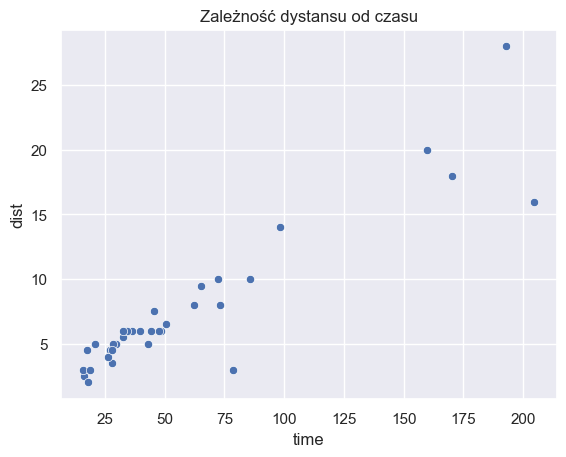

In [8]:
plt.figure()
sns.scatterplot(data=hills, x='time', y='dist')
plt.title('Zależność dystansu od czasu')
plt.show()

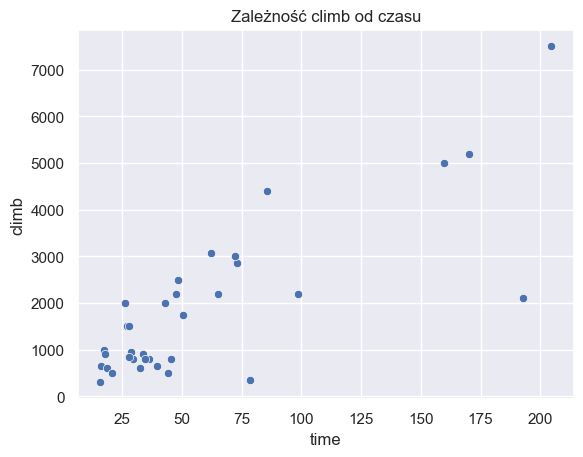

In [9]:
plt.figure()
sns.scatterplot(data=hills, x='time', y='climb')
plt.title('Zależność climb od czasu')
plt.show()

In [11]:
hills[['time', 'dist', 'climb']].corr()

,time,dist,climb
time,1.000000,0.919589,0.805239
dist,0.919589,1.000000,0.652346
climb,0.805239,0.652346,1.000000


### 1.1 Budujemy model regresji liniowej dla pary zmiennych dist i time

In [23]:
X = np.array(hills.dist).reshape(-1, 1)
y = hills.time

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X, y)

LinearRegression()

In [26]:
lm.coef_ # a = 8.33

array([8.33045619])

In [27]:
lm.intercept_ # b = -4.84

-4.840720185065344

### Zadanie 2
----
Na wykresie rozproszenia zaznacz wyestymowaną prostą z modelu liniowego.

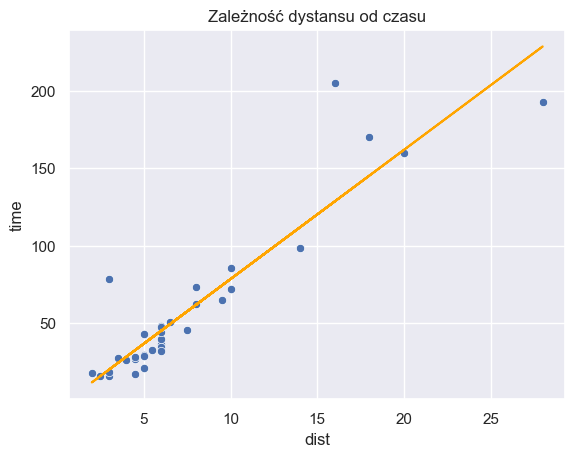

In [35]:
plt.figure()
sns.scatterplot(data=hills, x='dist', y='time')
plt.plot(hills.dist, hills.dist * lm.coef_ + lm.intercept_, color='orange')
plt.title('Zależność dystansu od czasu')
plt.show()

### Zadanie 3
Zbuduj model regresji liniowej wyliczający zależność *time* od *climb*, wyznacz współczynniki, narysuj wykres rozproszenie i zaznacz wyestymowaną prostą.

In [36]:
X = hills[['climb']]
y = hills.time

In [37]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

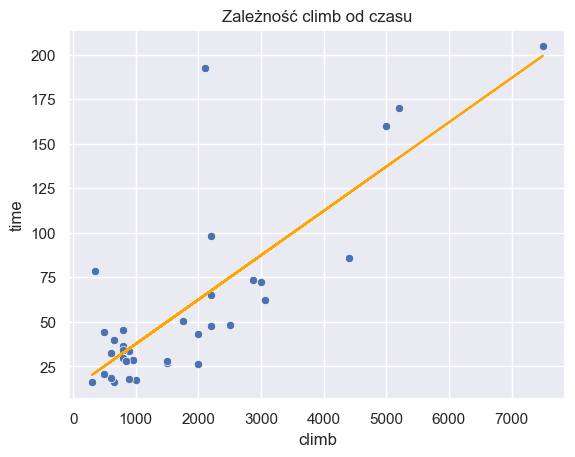

In [38]:
plt.figure()
sns.scatterplot(data=hills, x='climb', y='time')
plt.plot(hills.climb, hills.climb * lm.coef_ + lm.intercept_, color='orange')
plt.title('Zależność climb od czasu')
plt.show()

## 2. Model regresji logistycznej

In [52]:
df = pd.read_csv("SAheart.data").drop('row.names', axis=1)

### Zadanie 4
----
Przygotuj zbiór danych `SAheart.data` do dalszej pracy.


In [53]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [55]:
df.describe(include='all')

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462,462.000000,462.000000,462.000000,462.000000,462.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Absent,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,270,NaN,NaN,NaN,NaN,NaN
mean,138.326840,3.635649,4.740325,25.406732,NaN,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,NaN,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,NaN,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,NaN,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,NaN,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,NaN,60.000000,28.497500,23.892500,55.000000,1.000000


In [56]:
df = pd.get_dummies(df, dtype=np.int32)
df.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


In [57]:
X = df.drop('chd', axis=1)
y = df[['chd']]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Zadanie 5
a) Dopasuj model regresji logistycznej do danych `SAheart.data`.

b) Oblicz prawdopodobieństw przynależności do klasy 1 dla zbioru testowego:

  - metodą `decision_function` oraz odwrotnością funkcji logitowej
    
  - metodą `predict_proba`

c) Dokonaj predykcji dla obserwacji o wartości `sbp = 127`, `age = 30`, `alcohol = 0`, `obesity = 25`, `typea = 49`, `famhist = 'Present'`, `tobbaco = 0`, `ldl = 4.44`, `adiposity = 18`.

In [71]:
glm = LogisticRegression(penalty=None, max_iter=500)
glm.fit(X_train, y_train)

LogisticRegression(max_iter=500, penalty=None)

In [75]:
glm.predict_proba(X_test)[:, 1]

array([0.53972059, 0.43651111, 0.3638528 , 0.68135985, 0.30038066,
       0.63900895, 0.05150082, 0.17518041, 0.03334406, 0.5565862 ,
       0.30811519, 0.71680661, 0.17971494, 0.28845762, 0.41556448,
       0.55140893, 0.77124693, 0.04402689, 0.7093597 , 0.1716411 ,
       0.60947252, 0.29924975, 0.02842157, 0.34948191, 0.05592105,
       0.04261274, 0.64755753, 0.18164183, 0.22715665, 0.69706487,
       0.05153457, 0.45433359, 0.1521842 , 0.31506604, 0.37052304,
       0.05099602, 0.051308  , 0.59549439, 0.69259803, 0.02655804,
       0.16545592, 0.44889528, 0.02693987, 0.18704745, 0.3479753 ,
       0.16098877, 0.50876437, 0.22738607, 0.17666108, 0.5427812 ,
       0.05056651, 0.08545537, 0.82935418, 0.19695165, 0.08924354,
       0.14103256, 0.78461293, 0.21350465, 0.34965544, 0.38910961,
       0.20999815, 0.18928407, 0.05216351, 0.12006175, 0.10662366,
       0.235696  , 0.23943209, 0.0557016 , 0.63330058, 0.15315078,
       0.40660926, 0.63922232, 0.24699507, 0.24446906, 0.68594

In [76]:
glm.decision_function(X_test)

array([ 0.15921786, -0.25533377, -0.55868061,  0.76002819, -0.84548587,
        0.5710653 , -2.91328316, -1.54934833, -3.36696293,  0.22731862,
       -0.8089458 ,  0.92867605, -1.51827995, -0.90288682, -0.34100866,
        0.20636496,  1.21536546, -3.07792924,  0.89227632, -1.57404086,
        0.44509553, -0.85087302, -3.53177351, -0.62131732, -2.826269  ,
       -3.11205468,  0.60832024, -1.50526333, -1.22443653,  0.83335977,
       -2.91259255, -0.18317613, -1.71757177, -0.77654017, -0.52997362,
       -2.92366535, -2.91723746,  0.38672638,  0.81229357, -3.60150566,
       -1.61818073, -0.20513521, -3.58683867, -1.46931044, -0.62795095,
       -1.65088948,  0.03506106, -1.22313015, -1.53913485,  0.17154423,
       -2.93257594, -2.37043203,  1.5810571 , -1.40545664, -2.32290654,
       -1.80674023,  1.29275376, -1.30392823, -0.62055409, -0.45105646,
       -1.32493659, -1.45466884, -2.89979883, -1.99184553, -2.12570249,
       -1.17642278, -1.15579559, -2.83043339,  0.54640266, -1.71

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.

In [ ]:
earthquake = pd.read_csv("earthquake.txt", sep=" ")